<a href="https://colab.research.google.com/github/pr4sad/Machine-Learning/blob/main/Mini%20Project/MiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loading the data and libraries**

In [44]:
%load_ext autoreload
%autoreload 2

import os
import sys
import warnings

while any(marker in os.getcwd() for marker in ['workspace_dimred']):
    os.chdir("..")

sys.path.append('classes_and_functions_dimred')

current_directory = os.getcwd()
current_directory

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'/content'

In [45]:
# Importing external packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import itertools
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.api as sm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from statsmodels.formula.api import ols
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.base import BaseEstimator, TransformerMixin



from custom_functions_classes_dimred import (
    unique_column_content_check,
    corr_matrix_dataframe,
    calculate_skewness,
    DropColumnTransformer,
    CustomOutlierRemoverInterquartile,
    ColumnSelector,
    CustomMinMaxScaler,
    ModelEvaluator,
    plot_indices_relation,
    plot_histograms_nonbinary,
    plot_histograms_nonbinary_logarithmic,
    plot_class_distribution,

)


In [8]:
raw_data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
raw_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# **EXPLORATORY DATA ANALYSIS**

### **Data Cleaning and Formatting**

In [9]:
raw_data.shape

(299, 13)

In [10]:
raw_data.dtypes

,0
age,float64
anaemia,int64
creatinine_phosphokinase,int64
diabetes,int64
ejection_fraction,int64
high_blood_pressure,int64
platelets,float64
serum_creatinine,float64
serum_sodium,int64
sex,int64


In [11]:
raw_data.isnull().sum()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


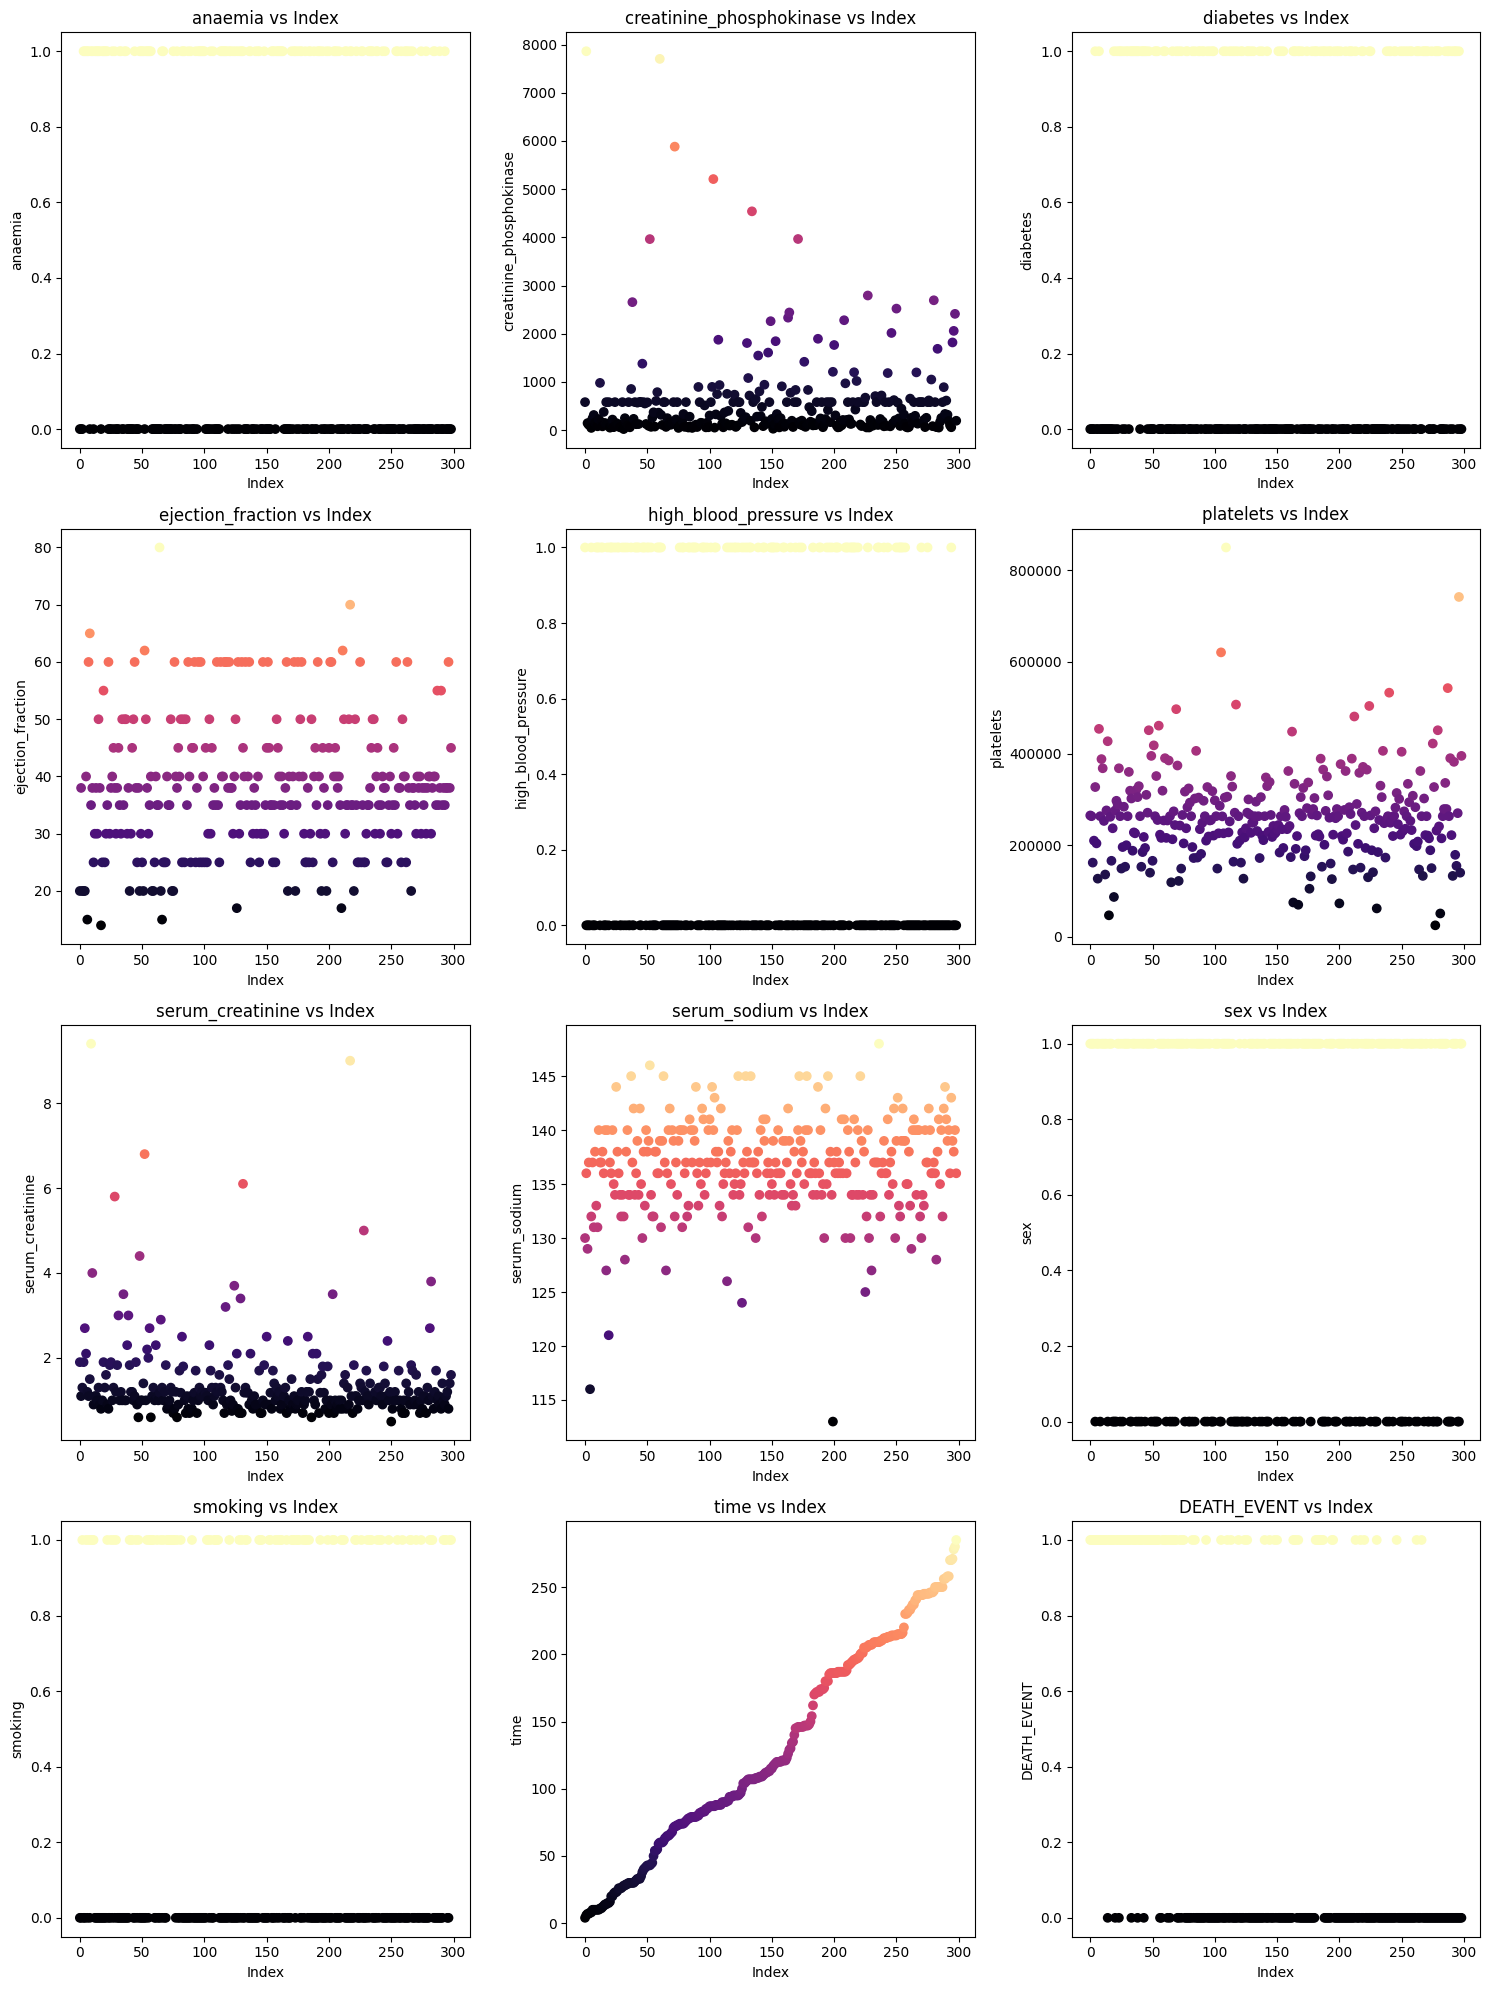

In [12]:
# Call the function with multiple indices
plot_indices_relation(raw_data, [1,2,3,4,5,6,7,8,9,10,11,12])

In [13]:
print("\nSummary statistics for numerical variables:")
raw_data.describe()


Summary statistics for numerical variables:


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [14]:
calculate_skewness(raw_data)

,Skewness,Skewness Label
age,0.423062,Not Skewed
anaemia,0.278261,Not Skewed
creatinine_phosphokinase,4.463110,Right Skewed
diabetes,0.333929,Not Skewed
ejection_fraction,0.555383,Right Skewed
high_blood_pressure,0.626732,Right Skewed
platelets,1.462321,Right Skewed
serum_creatinine,4.455996,Right Skewed
serum_sodium,-1.048136,Left Skewed
sex,-0.626732,Left Skewed


In [105]:
binary_columns = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
raw_data_nonbinary = raw_data.drop(binary_columns, axis=1)

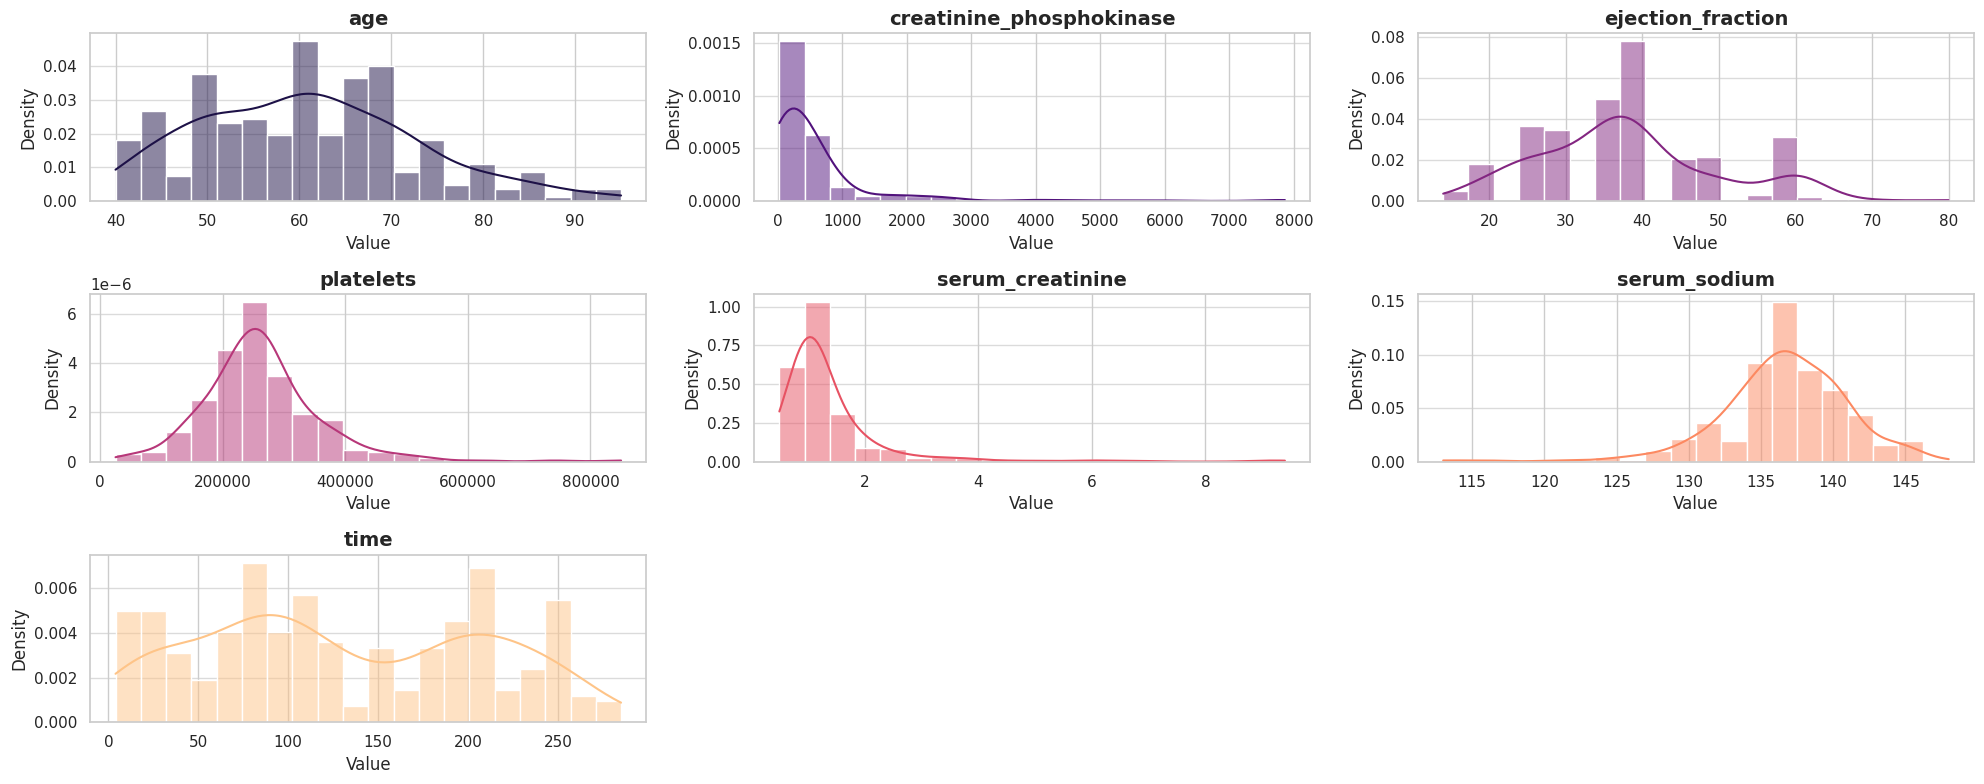

In [106]:
plot_histograms_nonbinary(raw_data_nonbinary, (20, 8))

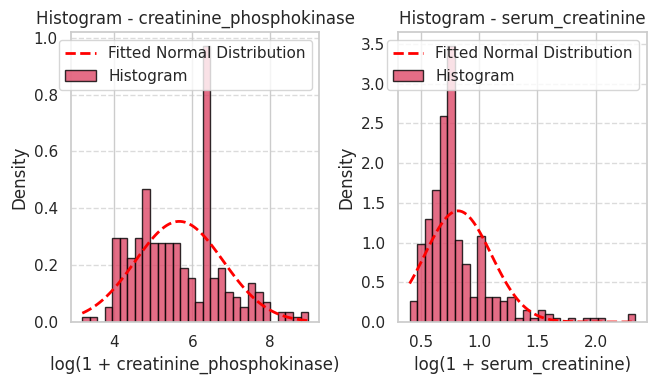

In [108]:
plot_histograms_nonbinary_logarithmic(raw_data_nonbinary, ['creatinine_phosphokinase', 'serum_creatinine'], (10, 4))

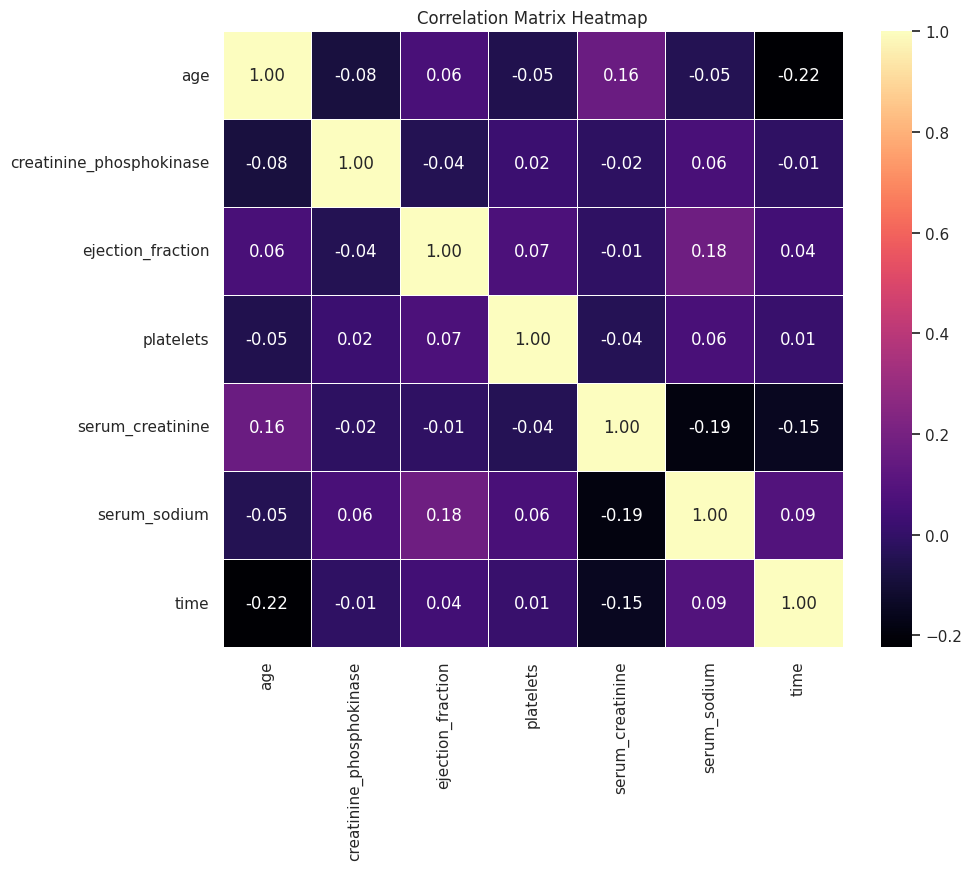

In [18]:
correlation_matrix = raw_data_nonbinary.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, linewidth=.5, fmt='.2f', cmap='magma')
plt.title('Correlation Matrix Heatmap')
plt.show()

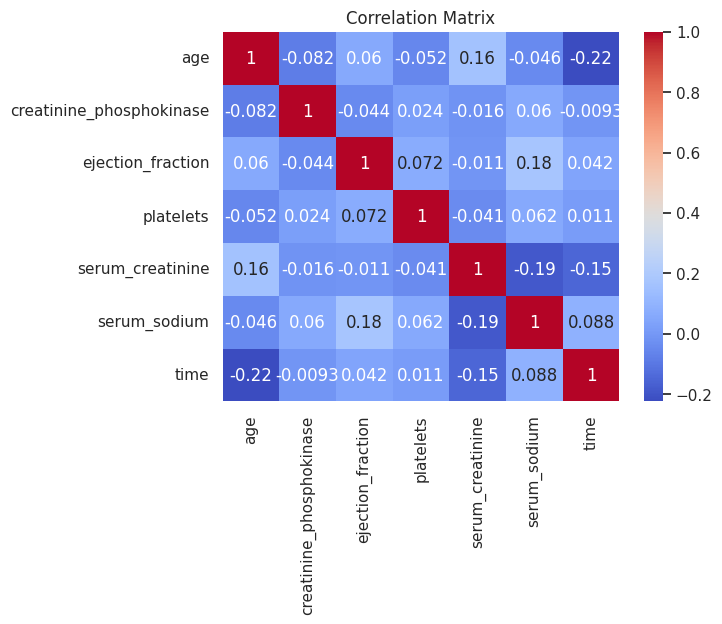

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
age,1.000000,-0.081584,0.060098,-0.052354,0.159187,-0.045966,-0.224068
creatinine_phosphokinase,-0.081584,1.000000,-0.044080,0.024463,-0.016408,0.059550,-0.009346
ejection_fraction,0.060098,-0.044080,1.000000,0.072177,-0.011302,0.175902,0.041729
platelets,-0.052354,0.024463,0.072177,1.000000,-0.041198,0.062125,0.010514
serum_creatinine,0.159187,-0.016408,-0.011302,-0.041198,1.000000,-0.189095,-0.149315
serum_sodium,-0.045966,0.059550,0.175902,0.062125,-0.189095,1.000000,0.087640
time,-0.224068,-0.009346,0.041729,0.010514,-0.149315,0.087640,1.000000


In [97]:
corr_matrix_dataframe(raw_data_nonbinary)

## **Class label distribution**

This dataset is **imbalanced** with almost  
2x samples labeled 0


Class=0, n=203 (67.893%)
Class=1, n=96 (32.107%)


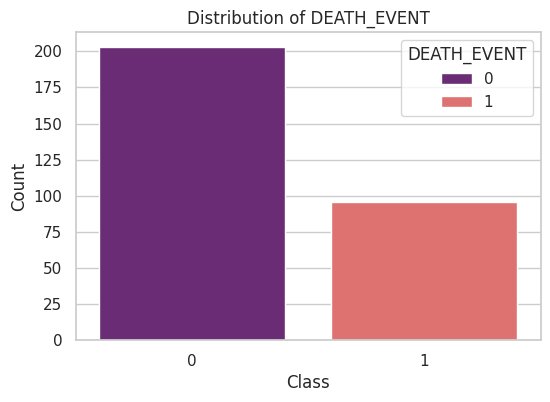

In [20]:
plot_class_distribution(raw_data['DEATH_EVENT'], 'DEATH_EVENT')

## **Data Cleaning**

In [21]:
raw_data['age'] = raw_data['age'].round().astype('int64')
raw_data['platelets'] = raw_data['platelets'].round().astype('int64')

In [22]:
raw_data.dtypes

,0
age,int64
anaemia,int64
creatinine_phosphokinase,int64
diabetes,int64
ejection_fraction,int64
high_blood_pressure,int64
platelets,int64
serum_creatinine,float64
serum_sodium,int64
sex,int64


In [23]:
data_cleaning = make_pipeline(
    FunctionTransformer(lambda X: X.drop_duplicates(), validate=False),
    CustomOutlierRemoverInterquartile(factor=2.5),
)
df_cleaned = data_cleaning.fit_transform(raw_data)
df_cleaned.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000,1.9,130,1,0,4,1
2,65,0,146,0,20,0,162000,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000,1.9,137,1,0,7,1
5,90,1,47,0,40,1,204000,2.1,132,1,1,8,1
6,75,1,246,0,15,0,127000,1.2,137,1,0,10,1


In [24]:
df_cleaned.shape

(251, 13)

In [25]:
print("\nSummary statistics:")
df_cleaned.describe()


Summary statistics:


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,60.980080,0.446215,357.290837,0.418327,38.254980,0.370518,257516.406375,1.179721,136.741036,0.641434,0.314741,130.844622,0.302789
std,11.879546,0.498092,318.577098,0.494270,11.981599,0.483908,80011.538715,0.399340,4.011068,0.480538,0.465341,76.569993,0.460383
min,40.000000,0.000000,30.000000,0.000000,14.000000,0.000000,25100.000000,0.600000,121.000000,0.000000,0.000000,4.000000,0.000000
25%,51.000000,0.000000,115.000000,0.000000,30.000000,0.000000,210000.000000,0.900000,134.000000,0.000000,0.000000,74.000000,0.000000
50%,60.000000,0.000000,224.000000,0.000000,38.000000,0.000000,262000.000000,1.100000,137.000000,1.000000,0.000000,117.000000,0.000000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,299000.000000,1.300000,140.000000,1.000000,1.000000,203.000000,1.000000
max,95.000000,1.000000,1688.000000,1.000000,80.000000,1.000000,504000.000000,2.500000,148.000000,1.000000,1.000000,285.000000,1.000000


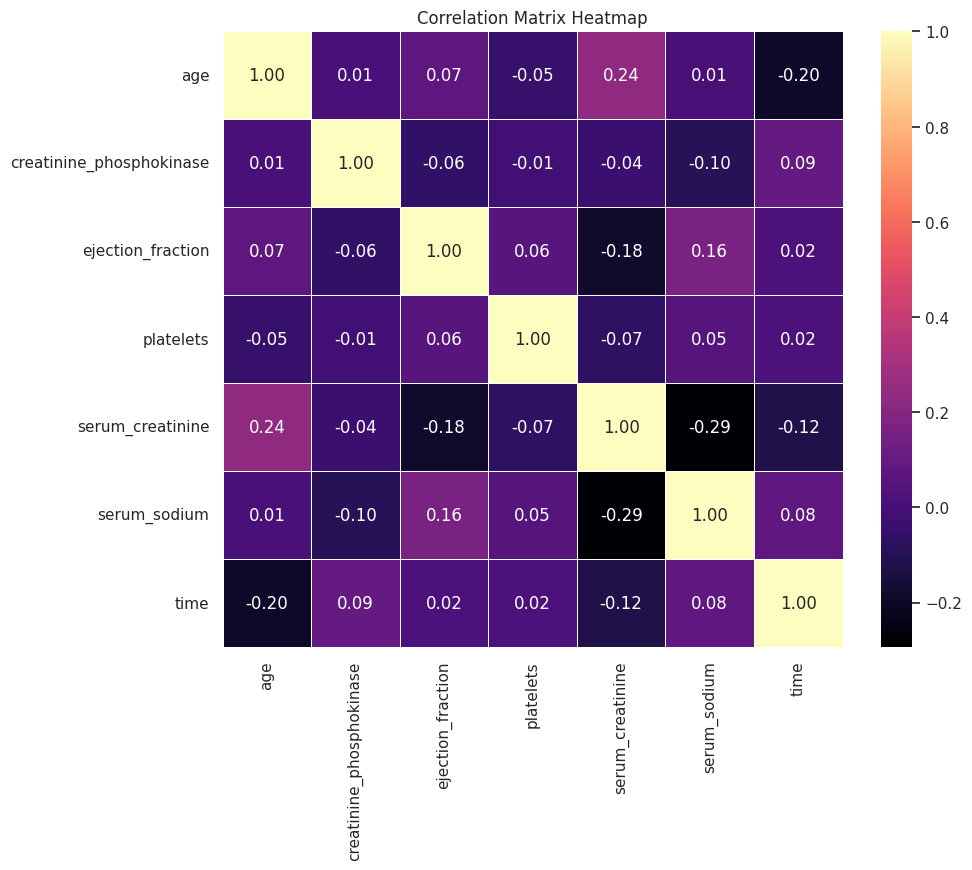

In [26]:
warnings.filterwarnings(action='ignore')
df_cleaned_nonbinary = df_cleaned.drop(binary_columns, axis=1)
correlation_matrix = df_cleaned_nonbinary.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, linewidth=.5, fmt='.2f', cmap='magma')
plt.title('Correlation Matrix Heatmap')
plt.show()

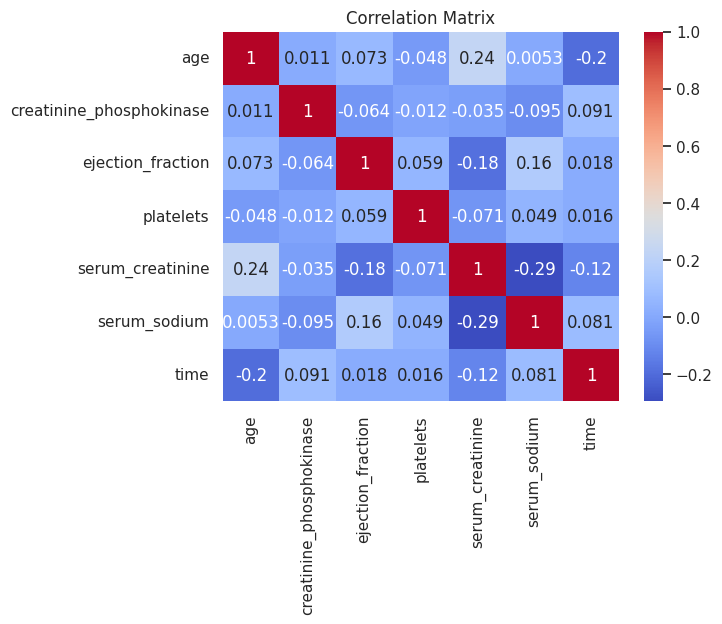

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
age,1.000000,0.010981,0.073074,-0.048481,0.235936,0.005348,-0.195629
creatinine_phosphokinase,0.010981,1.000000,-0.063602,-0.012198,-0.035400,-0.095236,0.090964
ejection_fraction,0.073074,-0.063602,1.000000,0.058940,-0.184765,0.164013,0.017562
platelets,-0.048481,-0.012198,0.058940,1.000000,-0.070739,0.048842,0.016320
serum_creatinine,0.235936,-0.035400,-0.184765,-0.070739,1.000000,-0.294318,-0.118357
serum_sodium,0.005348,-0.095236,0.164013,0.048842,-0.294318,1.000000,0.081411
time,-0.195629,0.090964,0.017562,0.016320,-0.118357,0.081411,1.000000


In [99]:
corr_matrix_dataframe(df_cleaned_nonbinary)

### **Data Preprocessing**

In [100]:
preprocessing_pipeline = make_pipeline(
    CustomMinMaxScaler(),  # Instantiate CustomMinMaxScaler without 'columns'
    ColumnSelector(columns=['age', 'ejection_fraction', 'serum_sodium', 'serum_creatinine', 'time', 'DEATH_EVENT']),
)

# Fit and transform using the modified pipeline
df_preprocessed_with_target = preprocessing_pipeline.fit_transform(df_cleaned)
df_preprocessed_with_target

,age,ejection_fraction,serum_sodium,serum_creatinine,time,DEATH_EVENT
0,0.636364,0.090909,0.333333,0.684211,0.000000,1.0
2,0.454545,0.090909,0.296296,0.368421,0.010676,1.0
3,0.181818,0.090909,0.592593,0.684211,0.010676,1.0
5,0.909091,0.393939,0.407407,0.789474,0.014235,1.0
6,0.636364,0.015152,0.592593,0.315789,0.021352,1.0
...,...,...,...,...,...,...
291,0.363636,0.318182,0.666667,0.421053,0.903915,0.0
292,0.218182,0.363636,0.703704,0.210526,0.903915,0.0
293,0.418182,0.318182,0.555556,0.157895,0.946619,0.0
294,0.400000,0.363636,0.814815,0.263158,0.946619,0.0


### **Resolving Imbalance**

Class=1.0, n=175 (50.000%)
Class=0.0, n=175 (50.000%)


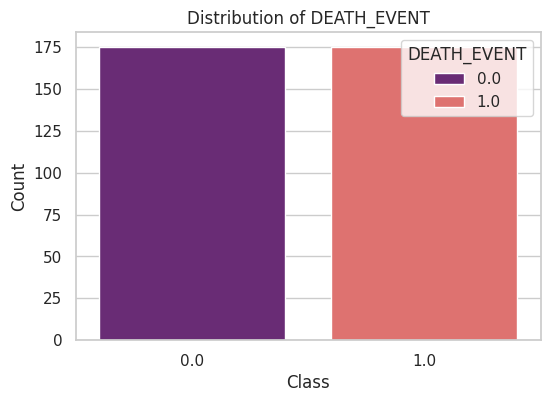

Class=0.0, n=76 (50.000%)
Class=1.0, n=76 (50.000%)


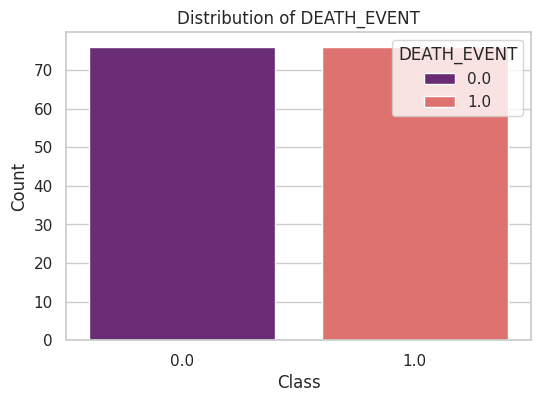

Class=1.0, n=136 (51.711%)
Class=0.0, n=127 (48.289%)


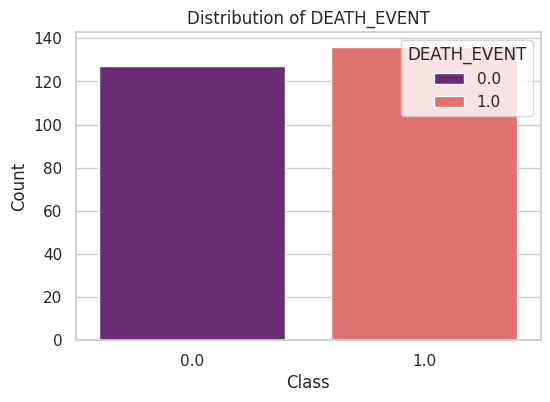

Original shape: (251, 5)
Oversampled dataset shape: (350, 5)
Undersampled dataset shape: (152, 5)
Sampled dataset shape (SMOTEENN): (263, 5)


In [46]:
### Oversample with SMOTE
df_copy = df_preprocessed_with_target.copy()

# Split features and target
y = df_copy['DEATH_EVENT']
X = df_copy.drop(['DEATH_EVENT'], axis=1)

smote_sampler = SMOTE(random_state=42)
oversampled_X, oversampled_y = smote_sampler.fit_resample(X, y)

# Plot resulting distribution
plot_class_distribution(oversampled_y, 'DEATH_EVENT')


### Undersample with Randome Under Sampler
rand_sampler = RandomUnderSampler(random_state=42)
undersampled_X, undersampled_y = rand_sampler.fit_resample(X, y)

# Plot resulting distribution
plot_class_distribution(undersampled_y, 'DEATH_EVENT')


### SMOTEENN
smoteenn_sampler = SMOTEENN(random_state=42)
combo_sampled_X, combo_sampled_y = smoteenn_sampler.fit_resample(X, y)

# Plot resulting distribution
plot_class_distribution(combo_sampled_y, 'DEATH_EVENT')


print(f'Original shape: {X.shape}')
print(f'Oversampled dataset shape: {oversampled_X.shape}')
print(f'Undersampled dataset shape: {undersampled_X.shape}')
print(f'Sampled dataset shape (SMOTEENN): {combo_sampled_X.shape}')

# **Algorithm Implementation**

### **Train-Test Split**

In [47]:
train=[]
test=[]
cv=[]
for i in range(0,101):
    from sklearn.model_selection import train_test_split
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=i)

    from sklearn.linear_model import LogisticRegression
    lr=LogisticRegression()
    lr.fit(x_train,y_train)

    train_pred=lr.predict(x_train)
    test_pred=lr.predict(x_test)

    from sklearn.metrics import accuracy_score
    train.append(accuracy_score(y_train,train_pred))
    test.append(accuracy_score(y_test,test_pred))

    from sklearn.model_selection import cross_val_score
    cv.append(cross_val_score(lr,x_train,y_train,cv=5,scoring='accuracy').mean())

em = pd.DataFrame({'Train':train, 'Test':test, 'CV':cv})
gm = em[(abs(em['Train']-em['Test'])<=0.05) & (abs(em['Test']-em['CV'])<=0.05)]
rs = gm[gm['CV']==gm['CV'].max()].index.to_list()[0]
print('Best Random State:',rs)

Best Random State: 98


In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=98)

## **1. Logistic Regression**

**Modeling**

In [49]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(x_train,y_train)

train_pred=reg.predict(x_train)
test_pred=reg.predict(x_test)
#Evaluation
print('Train Accuracy:',accuracy_score(y_train,train_pred))
print('Test Accuracy:',accuracy_score(y_test,test_pred))
print("Mean_squared_error: ",mean_squared_error(y_test,test_pred))
print("R2_score: ",r2_score(y_test,test_pred))
print('CV score:',cross_val_score(reg,x_train,y_train,cv=5).mean())

Train Accuracy: 0.87
Test Accuracy: 0.8431372549019608
Mean_squared_error:  0.1568627450980392
R2_score:  0.24444444444444446
CV score: 0.8550000000000001


**Confusion Matrix**

In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,test_pred)
cm

array([[34,  2],
       [ 6,  9]])

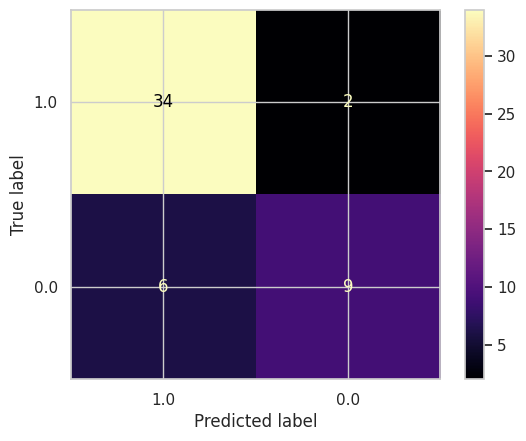

In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm, display_labels=df_copy['DEATH_EVENT'].unique()).plot(cmap='magma')
plt.show()

**Classification Report**

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred))


              precision    recall  f1-score   support

         0.0       0.85      0.94      0.89        36
         1.0       0.82      0.60      0.69        15

    accuracy                           0.84        51
   macro avg       0.83      0.77      0.79        51
weighted avg       0.84      0.84      0.84        51



**ROC and AUC**

In [59]:
from sklearn.metrics import roc_curve, auc
y_pred_proba = reg.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

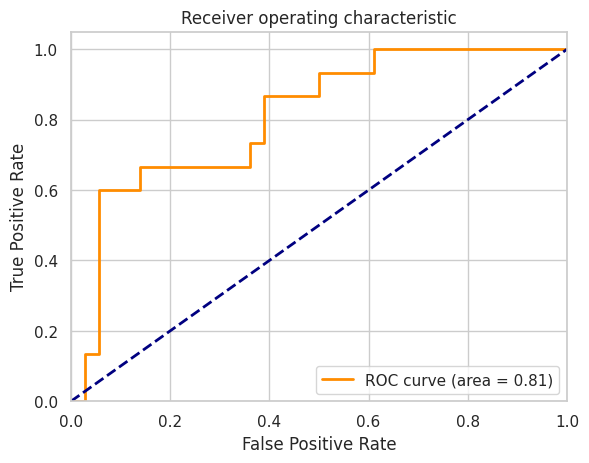

In [60]:
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [55]:
from sklearn.metrics import roc_auc_score
print('AUC Score:',roc_auc_score(y_test,test_pred))

AUC Score: 0.7722222222222223


## **2. KNN**

**HyperParameter Tuning (for finding best value of number of neighbors)**

In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
param_grid={'n_neighbors':list(range(1,30))}

model=GridSearchCV(knn,param_grid,scoring='accuracy')
model.fit(x_train,y_train)
model.best_params_

{'n_neighbors': 7}

**Modeling**

In [87]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)

train_pred=knn.predict(x_train)
test_pred=knn.predict(x_test)
#Evaluation
print('Train Accuracy:',accuracy_score(y_train,train_pred))
print('Test Accuracy:',accuracy_score(y_test,test_pred))
print("Mean_squared_error: ",mean_squared_error(y_test,test_pred))
print("R2_score: ",r2_score(y_test,test_pred))
print('CV score:',cross_val_score(knn,x_train,y_train,cv=5,scoring='accuracy').mean())

Train Accuracy: 0.885
Test Accuracy: 0.7647058823529411
Mean_squared_error:  0.23529411764705882
R2_score:  -0.1333333333333333
CV score: 0.8700000000000001


**Confusion Matrix**

In [88]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_test,test_pred)
cm

array([[32,  4],
       [ 8,  7]])

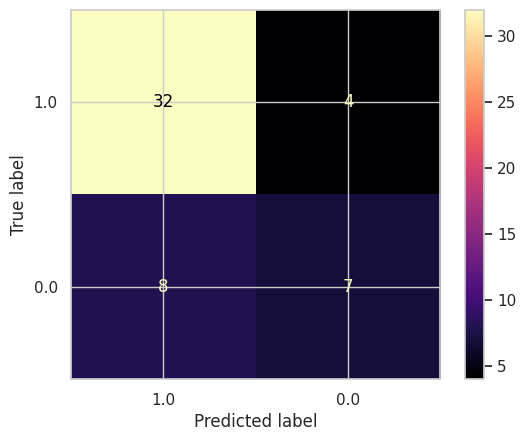

In [89]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm, display_labels=df_copy['DEATH_EVENT'].unique()).plot(cmap='magma')
plt.show()

**Classification Report**

In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.89      0.84        36
         1.0       0.64      0.47      0.54        15

    accuracy                           0.76        51
   macro avg       0.72      0.68      0.69        51
weighted avg       0.75      0.76      0.75        51



**ROC and AUC**

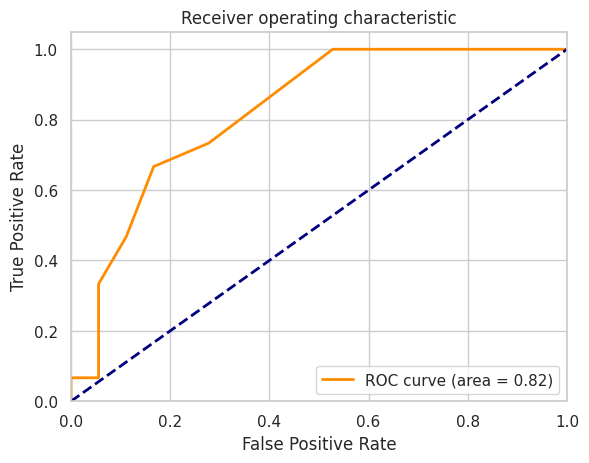

In [91]:
from sklearn.metrics import roc_curve, auc
y_pred_proba = knn.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [92]:
from sklearn.metrics import roc_auc_score
print('AUC Score:',roc_auc_score(y_test,test_pred))

AUC Score: 0.6777777777777778


## **3. SVM**

**HyperParameter Tuning (for finding best value of C and kernel)**

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svm=SVC()
param_grid = {'C':list(range(1,100)), 'kernel':['linear','polynomial','rbf','sigmoid']}
model=GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
model.fit(x_train,y_train)
model.best_params_

{'C': 1, 'kernel': 'rbf'}

**Modeling**

In [70]:
svm=SVC(C=1,kernel='rbf')
svm.fit(x_train,y_train)

train_pred=svm.predict(x_train)
test_pred=svm.predict(x_test)
#Evaluation
print('Train Accuracy:',accuracy_score(y_train,train_pred))
print('Test Accuracy:',accuracy_score(y_test,test_pred))
print("Mean_squared_error: ",mean_squared_error(y_test,test_pred))
print("R2_score: ",r2_score(y_test,test_pred))
print('CV score:',cross_val_score(svm,x_train,y_train,cv=5,scoring='accuracy').mean())

Train Accuracy: 0.91
Test Accuracy: 0.8235294117647058
Mean_squared_error:  0.17647058823529413
R2_score:  0.15000000000000002
CV score: 0.8699999999999999


**Confusion Matrix**

In [71]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_test,test_pred)
cm

array([[33,  3],
       [ 6,  9]])

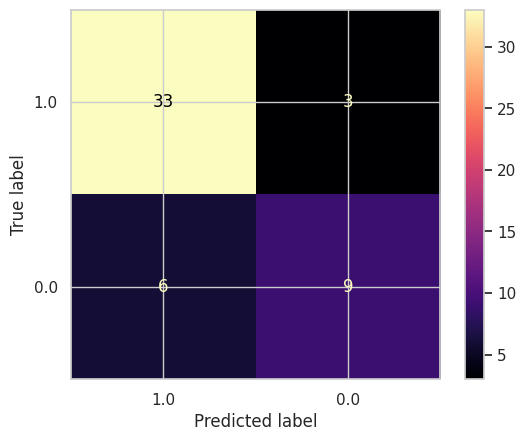

In [72]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm, display_labels=df_copy['DEATH_EVENT'].unique()).plot(cmap='magma')
plt.show()

**Classification Report**

In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.92      0.88        36
         1.0       0.75      0.60      0.67        15

    accuracy                           0.82        51
   macro avg       0.80      0.76      0.77        51
weighted avg       0.82      0.82      0.82        51



**ROC and AUC**

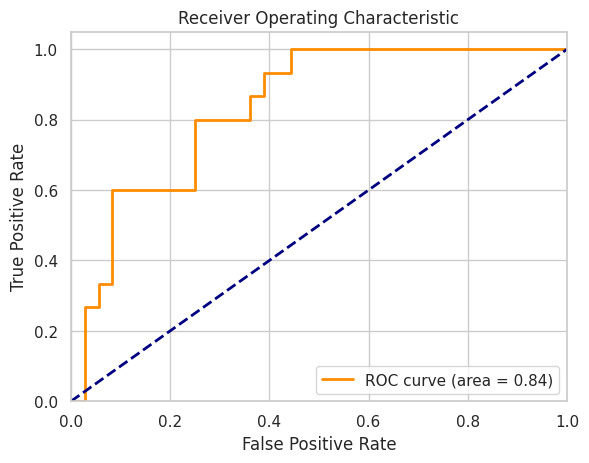

In [77]:
svm = SVC(probability=True, random_state=42)  # Set probability=True
svm.fit(x_train, y_train)  # Replace with your training data

# Get predicted probabilities for the positive class
y_pred_proba = svm.predict_proba(x_test)[:, 1]

# Calculate ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [140]:
from sklearn.metrics import roc_auc_score
print('AUC Score:',roc_auc_score(y_test,test_pred))

AUC Score: 0.7583333333333334


## **4. Decision Tree**

**HyperParameter Tuning (to find whether to use entropy or gini)**

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
DecT=DecisionTreeClassifier()
DecT.fit(x_train,y_train)
param_grid={'criterion':['gini','entropy']}
model=GridSearchCV(DecT, param_grid, cv=5, scoring='accuracy')
model.fit(x_train,y_train)
model.best_params_

{'criterion': 'gini'}

**Modeling**

In [79]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='gini')
dt.fit(x_train,y_train)

train_pred=dt.predict(x_train)
test_pred=dt.predict(x_test)
#Evaluation
print('Train Accuracy:',accuracy_score(y_train,train_pred))
print('Test Accuracy:',accuracy_score(y_test,test_pred))
print("Mean_squared_error: ",mean_squared_error(y_test,test_pred))
print("R2_score: ",r2_score(y_test,test_pred))
print('CV score:',cross_val_score(dt,x_train,y_train,cv=5,scoring='accuracy').mean())

Train Accuracy: 1.0
Test Accuracy: 0.6862745098039216
Mean_squared_error:  0.3137254901960784
R2_score:  -0.5111111111111111
CV score: 0.845


**Confusion Matrix**

In [80]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_test,test_pred)
cm

array([[25, 11],
       [ 5, 10]])

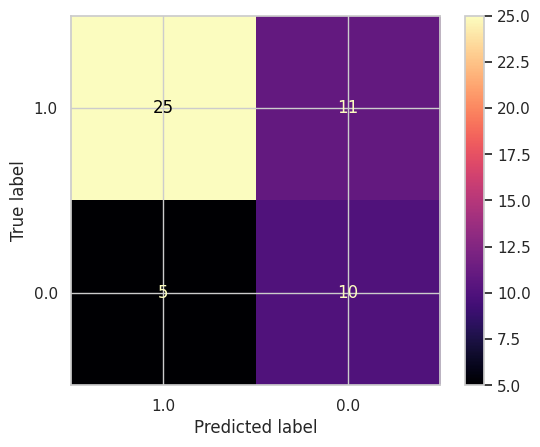

In [81]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm, display_labels=df_copy['DEATH_EVENT'].unique()).plot(cmap='magma')
plt.show()

**Classification Report**

In [82]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.69      0.76        36
         1.0       0.48      0.67      0.56        15

    accuracy                           0.69        51
   macro avg       0.65      0.68      0.66        51
weighted avg       0.73      0.69      0.70        51



**ROC and AUC**

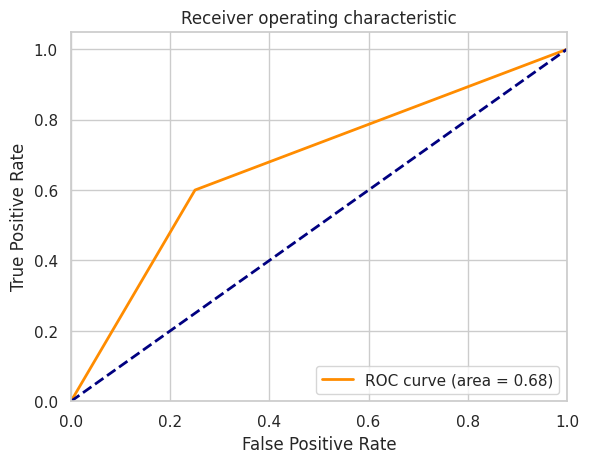

In [83]:
from sklearn.metrics import roc_curve, auc
y_pred_proba = DecT.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [84]:
from sklearn.metrics import roc_auc_score
print('AUC Score:',roc_auc_score(y_test,test_pred))

AUC Score: 0.6805555555555555


# **MODEL COMPARISON**

In [186]:
# Initialize accuracy list
acc = []

# Names of the models
names = ['LogisticRegression', 'KNN', 'SVM', 'DecisionTree']

# Extend the accuracy list with the scores of each model on the test set
acc.extend([
    reg.score(x_test, y_test),
    knn.score(x_test, y_test),
    svm.score(x_test, y_test),
    DecT.score(x_test, y_test)
])

# Output the accuracies
acc


[0.8431372549019608,
 0.7647058823529411,
 0.8235294117647058,
 0.6666666666666666]

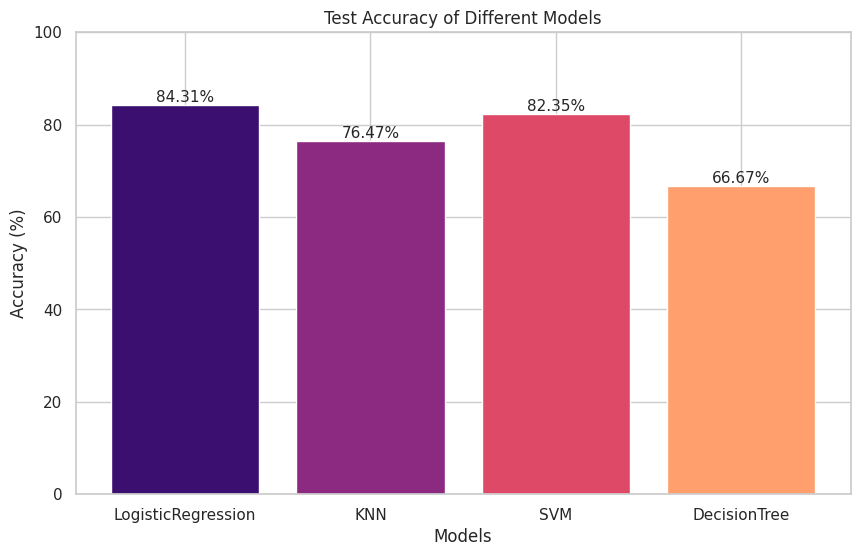

In [181]:
names = ['LogisticRegression', 'KNN', 'SVM', 'DecisionTree']

acc_percent = [round(a * 100, 2) for a in acc]
colors = plt.cm.magma([0.2, 0.4, 0.6, 0.8])

plt.figure(figsize=(10, 6))
bars = plt.bar(names, acc_percent, color=colors)
plt.title("Test Accuracy of Different Models")
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)  # Set y-axis range for percentages
for bar, acc in zip(bars, acc_percent):
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Center text
        bar.get_height(),                   # Position text at the top of the bar
        f"{acc}%",                          # Format as percentage
        ha='center', va='bottom', fontsize=11
    )

plt.show()


In [102]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score # Import cross_val_score from model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

# Sample data
# Replace this with your actual data
data = pd.DataFrame({
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100),
    'target': np.random.randint(0, 2, size=100)
})

# Splitting the dataset
X = data[['feature1', 'feature2']]
y = data['target']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
reg = LogisticRegression(max_iter=1000)

# Hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],               # Inverse of regularization strength
    'penalty': ['l1', 'l2', 'elasticnet', None], # Type of regularization
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], # Optimization algorithm
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=reg, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# Fit the model
grid_search.fit(x_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the results
print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Score:", best_score)

# Evaluate the model with the best parameters on the test set
best_model = grid_search.best_estimator_
train_pred = best_model.predict(x_train)
test_pred = best_model.predict(x_test)

# Evaluation
print('Train Accuracy:', accuracy_score(y_train, train_pred))
print('Test Accuracy:', accuracy_score(y_test, test_pred))
print("Mean Squared Error:", mean_squared_error(y_test, test_pred))
print("R2 Score:", r2_score(y_test, test_pred))
print('CV Score:', cross_val_score(best_model, x_train, y_train, cv=5).mean())


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation Score: 0.525
Train Accuracy: 0.525
Test Accuracy: 0.65
Mean Squared Error: 0.35
R2 Score: -0.5384615384615388
CV Score: 0.525
